In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('../data/santander'))

['test.csv', 'train.csv', 'sample_submission.csv']


In [3]:
df_train = pd.read_csv('../data/santander/train.csv')
df_test = pd.read_csv('../data/santander/test.csv')
print(df_train.shape, df_test.shape)

(200000, 202) (200000, 201)


In [18]:
def kesson_table(df):
    total = df.isnull().sum()
    percent = total / len(df) * 100
    kesson_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return kesson_table

In [25]:
kesson = kesson_table(df_train)
kesson = kesson.drop(kesson[kesson.isnull() == 0], axis=1)

In [26]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [65]:
train = df_train.drop(['ID_code', 'target'], axis=1)
train_ = df_train['target']
test = df_test.drop(['ID_code'], axis=1)

X_train = train.values
y_train = train_.values
X_test = test.values

print(X_train.shape, y_train.shape, X_test.shape)

(200000, 200) (200000,) (200000, 200)


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import Adam

In [68]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=200, kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='relu', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                2010      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1100      
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 3,211
Trainable params: 3,211
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=2000, epochs=50, verbose=1)

scores = model.evaluate(X_train, y_train, batch_size=20)
print('%s: %0.2f%%' % (model.metrics_names[1], scores[1]* 100))

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 2s 12us/step - loss: 0.3189 - acc: 0.9001 - val_loss: 0.2615 - val_acc: 0.8993
Epoch 2/50
160000/160000 [==============================] - 1s 9us/step - loss: 0.2555 - acc: 0.9058 - val_loss: 0.2369 - val_acc: 0.9091
Epoch 3/50
160000/160000 [==============================] - 1s 9us/step - loss: 0.2482 - acc: 0.9074 - val_loss: 0.2359 - val_acc: 0.9101
Epoch 4/50
160000/160000 [==============================] - 1s 9us/step - loss: 0.2453 - acc: 0.9081 - val_loss: 0.2353 - val_acc: 0.9103
Epoch 5/50
160000/160000 [==============================] - 2s 10us/step - loss: 0.2438 - acc: 0.9080 - val_loss: 0.2353 - val_acc: 0.9099
Epoch 6/50
160000/160000 [==============================] - 1s 9us/step - loss: 0.2427 - acc: 0.9088 - val_loss: 0.2363 - val_acc: 0.9086
Epoch 7/50
160000/160000 [==============================] - 1s 9us/step - loss: 0.2410 - acc: 0.9099 - val_loss: 0.2366

In [53]:
predict = model.predict(X_test)

In [54]:
df = pd.DataFrame(predict)

In [55]:
df.columns = ['target']

In [56]:
df.head()

,target
0,0.232316
1,0.284406
2,0.069627
3,0.283606
4,0.072061


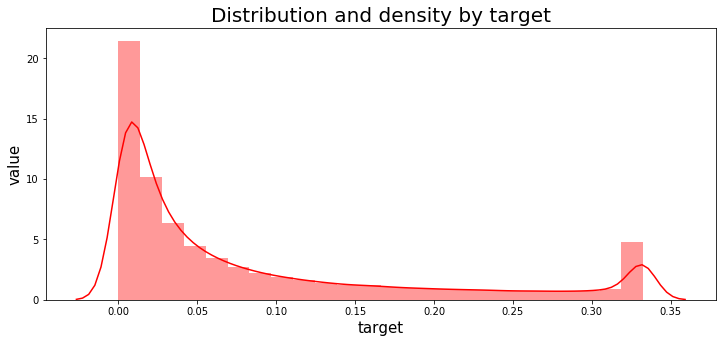

In [57]:
plt.figure(figsize=(12, 5))

sns.distplot(df['target'], bins=24, color='r')
plt.title('Distribution and density by target', fontsize=20)
plt.xlabel('target', fontsize=15)
plt.ylabel('value', fontsize=15)

plt.show()

In [58]:
df['target'][df['target'] > 0.31] = 1
df['target'][df['target'] <= 0.31] = 0

In [59]:
df['target'].value_counts()

0.0    185123
1.0     14877
Name: target, dtype: int64

In [62]:
predict = df.values

df_out = pd.read_csv('../data/santander/test.csv')
df_out['target'] = predict
df_out[['ID_code', 'target']].to_csv('../data/santander/output/submission.csv', index=False)

In [70]:
predict = model.predict(X_test)

df_out = pd.read_csv('../data/santander/test.csv')
df_out['target'] = predict
df_out[['ID_code', 'target']].to_csv('../data/santander/output/submission.csv', index=False)